<a href="https://colab.research.google.com/github/JuanD-Pimiento/CursoIA_MECATRONICA/blob/main/Fuzzy_3mf_5mf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 22.4 MB/s eta 0:00:00


# 2. Importar librerias

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Diseñar un control proporcional para una entrada (error) y una salida(acción de control)

**Variable de entrada (input)- Antecedente**

error
*   ¿Qué tan grande es el error?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-100,100] %

**Variable de salida (output)- Consecuencia**

control
*   La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-12,12] %

**Reglas**

1.   **SI** El error es *negativo* **ENTONCES** La acción de control es *negativa*
2.   **SI** El error es *cero* **ENTONCES** La acción de control es *cero*
3.   **SI** El error es *positivo* **ENTONCES** La acción de control es *positivo*





#Solución con 3 funciones de membresía

### **PASO 1. Variable de entrada**

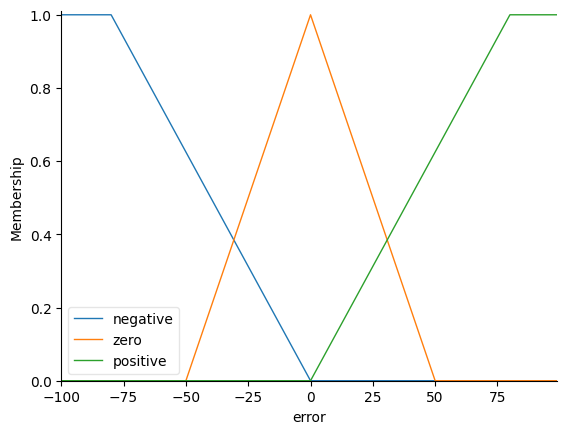

In [197]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-80,0])
error['zero'] = fuzz.trimf(error.universe,[-50,0,50])
error['positive'] = fuzz.trapmf(error.universe,[0,80,100,100])
error.view()

Para las variables de entrada, modifiqué las funciones de membresía de la siguiente manera:
* Para error negativo vale 1 entre [-100,-80), desciende linealmente de 1 a 0 para valores de error entre [-80,0), y vale 0 desde [0,100].
* Para error "cero" su valor asciende linealmente de 0 a 1 para valores de error entre (-50,0] y desciende linealmente de 1 a 0 para valores de error entre [0,50). En cualquier otro caso, vale cero.
* Para error positivo vale 0 desde [-100, 0], asciende linealmente de 0 a 1 para valores de error entre (0,80], y vale 1 desde (80,100]

### **PASO 2. Variable de salida**

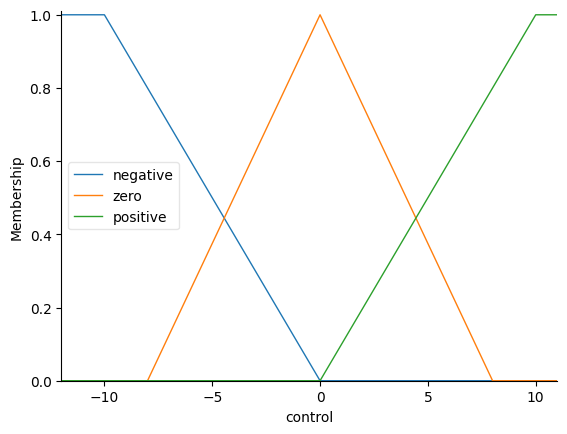

In [198]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,-0])
control['zero'] = fuzz.trimf(control.universe,[-8,0,8])
control['positive'] = fuzz.trapmf(control.universe,[0,10,12,12])
control.view()

Para las variables de salida, modifiqué las funciones de membresía de la siguiente manera:
* Para señal de control negativa vale 1 entre [-12,-10), desciende linealmente de 1 a 0 para valores de error entre [-10,0), y vale 0 desde [0,12].
* Para señal de control "cero" su valor asciende linealmente de 0 a 1 para valores de error entre (-8,0] y desciende linealmente de 1 a 0 para valores de error entre [0,8). En cualquier otro caso, vale cero.
* Para señal de control positiva vale 0 desde [-12, 0], asciende linealmente de 0 a 1 para valores de error entre (0,10], y vale 1 desde (10,12]

### **PASO 3. Inferencia**

In [199]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [200]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 2.1483657730444365
Salida defuzzificada  redondeada= 2.15


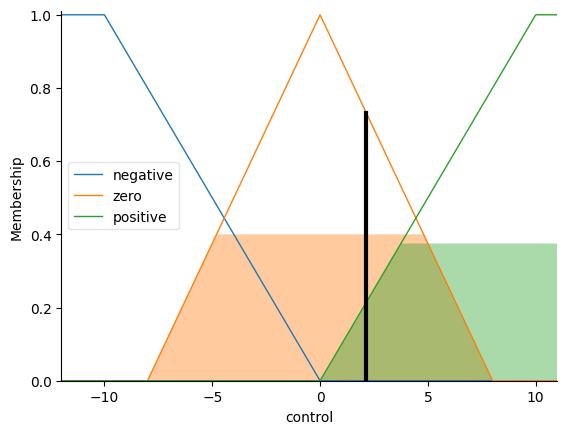

In [201]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [202]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [203]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [204]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

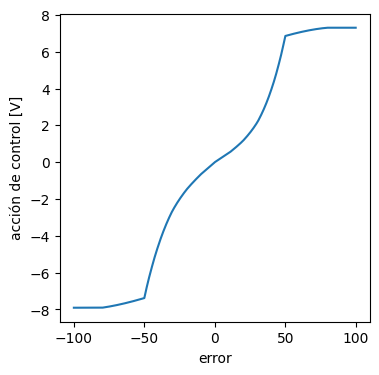

In [205]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

En la gráfica de acción de control contra error, se puede observar que las regiones donde la acción de control se satura son para errores cuya magnitud es mayor al 80%, como se definio en las funciones de membresía de la entrada; y se puede observar que con la configuración establecida, la acción de control tiene una variación exponencial para errores con magnitud menor al 50%, lo que permitiria un mejor manejo de la acción de control en este rango de valores.

#Solución con 5 funciones de membresía

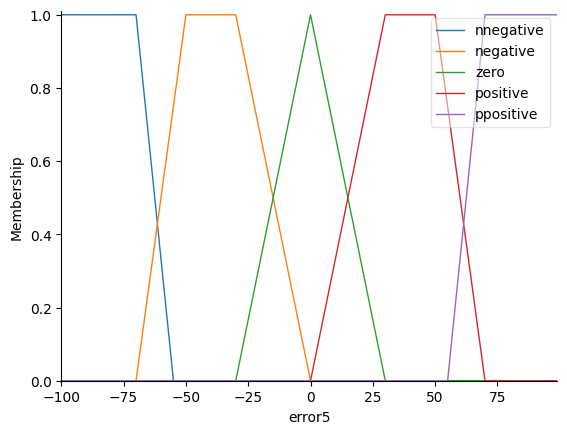

In [206]:
error5 = ctrl.Antecedent(np.arange(-100,100,1),'error5')
error5['nnegative'] = fuzz.trapmf(error5.universe,[-100,-100,-70,-55])
error5['negative'] = fuzz.trapmf(error5.universe,[-70,-50,-30,0])
error5['zero'] = fuzz.trimf(error5.universe,[-30,0,30])
error5['positive'] = fuzz.trapmf(error5.universe,[0,30,50,70])
error5['ppositive'] = fuzz.trapmf(error5.universe,[55,70,100,100])
error5.view()

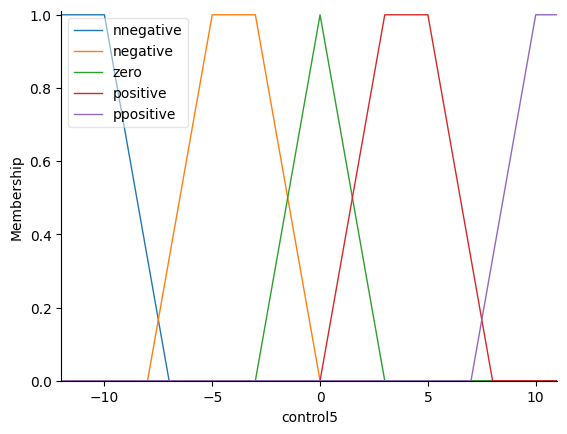

In [207]:
control5 = ctrl.Consequent(np.arange(-12,12,1), 'control5')
control5['nnegative'] = fuzz.trapmf(control5.universe,[-12,-12,-10,-7])
control5['negative'] = fuzz.trapmf(control5.universe,[-8,-5,-3,-0])
control5['zero'] = fuzz.trimf(control5.universe,[-3,0,3])
control5['positive'] = fuzz.trapmf(control5.universe,[0,3,5,8])
control5['ppositive'] = fuzz.trapmf(control5.universe,[7,10,12,12])
control5.view()

In [208]:
rule1 = ctrl.Rule(error5['nnegative'],control5['nnegative'])
rule2 = ctrl.Rule(error5['negative'],control5['negative'])
rule3 = ctrl.Rule(error5['zero'],control5['zero'])
rule4 = ctrl.Rule(error5['positive'],control5['positive'])
rule5 = ctrl.Rule(error5['ppositive'],control5['ppositive'])

In [209]:
control_sys5 = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
control_sim5 = ctrl.ControlSystemSimulation(control_sys5)

Salida defuzzificada = 4.0
Salida defuzzificada  redondeada= 4.0


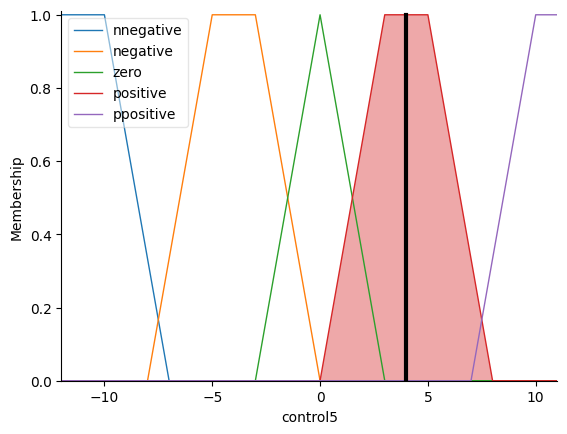

In [211]:
control_sim5.input['error5'] = 30
control_sim5.compute()
control5.view(sim=control_sim5)
print("Salida defuzzificada =", control_sim5.output['control5'])
print("Salida defuzzificada  redondeada=", round(control_sim5.output['control5'],2))

In [212]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [214]:
for i in range (n):
  control_sim5.input['error5'] = error_values[i]
  control_sim5.compute()
  out[i]  = control_sim5.output['control5']

Text(0, 0.5, 'acción de control [V]')

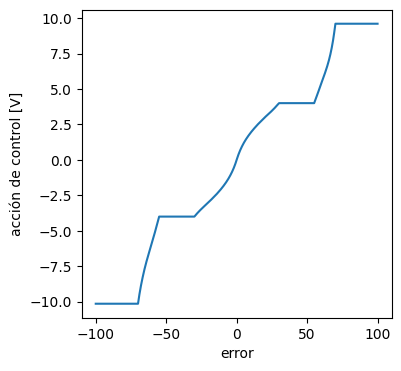

In [215]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

En esta gráfica se puede observar que la acción de control presente una respuesta que contiene dos regiones con saturación, lo que podria afectar significativamente al momento de implementar el controlador.